# Comparison of Results
## Prerequisits

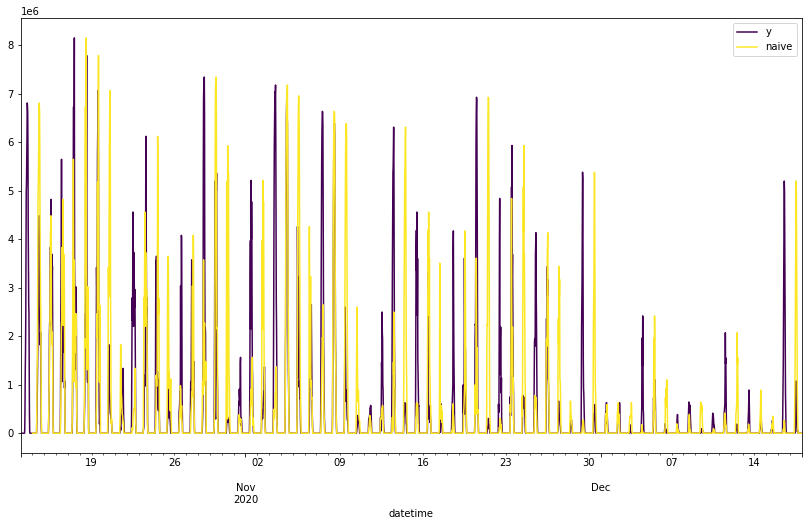

,y,naive
datetime,,
2020-10-13 00:00:00,0.0,NaN
2020-10-13 00:30:00,0.0,NaN
2020-10-13 01:00:00,0.0,NaN
2020-10-13 01:30:00,0.0,NaN
2020-10-13 02:00:00,0.0,NaN
...,...,...
2020-12-17 22:00:00,0.0,0.0
2020-12-17 22:30:00,0.0,0.0
2020-12-17 23:00:00,0.0,0.0


In [27]:
import user_data as ud
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

plt.rcParams['figure.figsize'] = (14, 8)

def mse(errors):
    return (errors ** 2).mean()

def rmse(mse):
    return mse ** 0.5

def mae(errors):
    return errors.abs().mean()

def mape(errors, y):
    wo0 = y != 0
    return errors[wo0].div(y[wo0], 0).abs().mean()

conn = create_engine('postgresql+psycopg2://{}:{}@{}:{}/{}'.format(
    ud.user, ud.password, ud.host, ud.port, ud.database
)).connect()

res = pd.read_sql('SELECT * FROM results', conn, 'datetime')
res.index = res.index.tz_localize(None)
res.index.freq = pd.infer_freq(res.index)

res.plot(colormap='viridis')
plt.show()
res

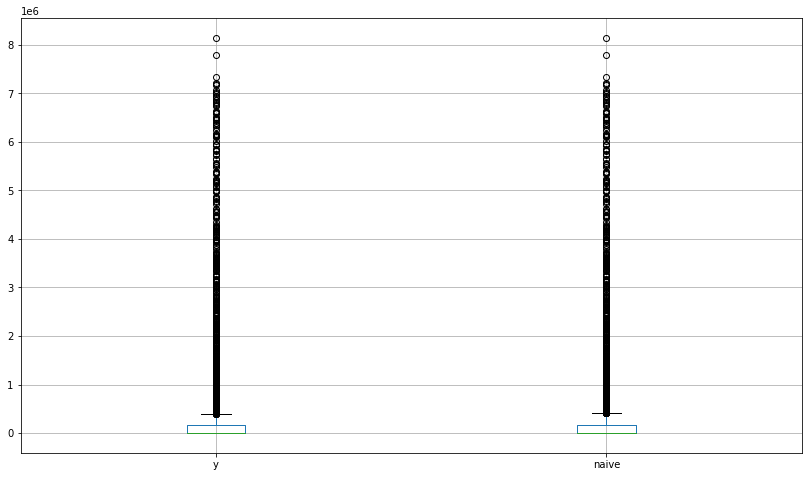

,datetime,y,naive
count,3169,3.169000e+03,3.121000e+03
mean,2020-11-14 23:59:59.999999744,4.565290e+05,4.621503e+05
min,2020-10-13 00:00:00,0.000000e+00,0.000000e+00
25%,2020-10-29 12:00:00,0.000000e+00,0.000000e+00
50%,2020-11-15 00:00:00,0.000000e+00,0.000000e+00
75%,2020-12-01 12:00:00,1.582965e+05,1.624553e+05
max,2020-12-18 00:00:00,8.146009e+06,8.146009e+06
std,NaN,1.206499e+06,1.214522e+06


In [3]:
res.boxplot()
plt.show()
res.reset_index().describe(datetime_is_numeric=True)

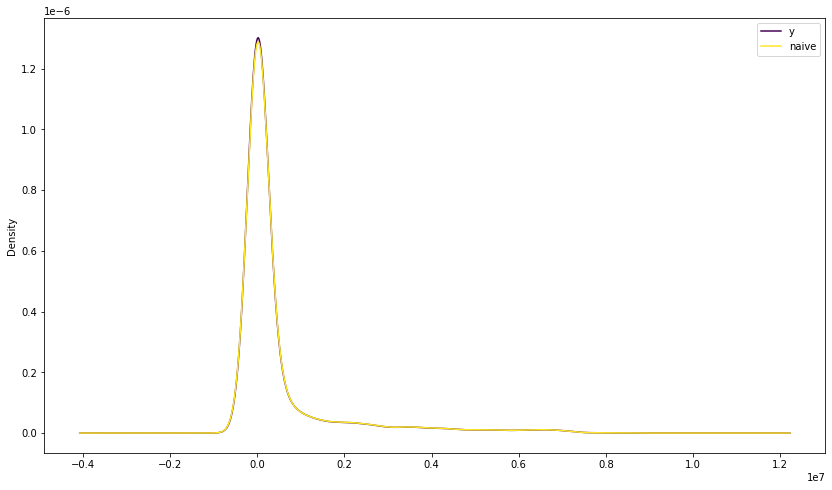

In [4]:
res.plot(kind='density', colormap='viridis')
plt.show()

## Error Measures

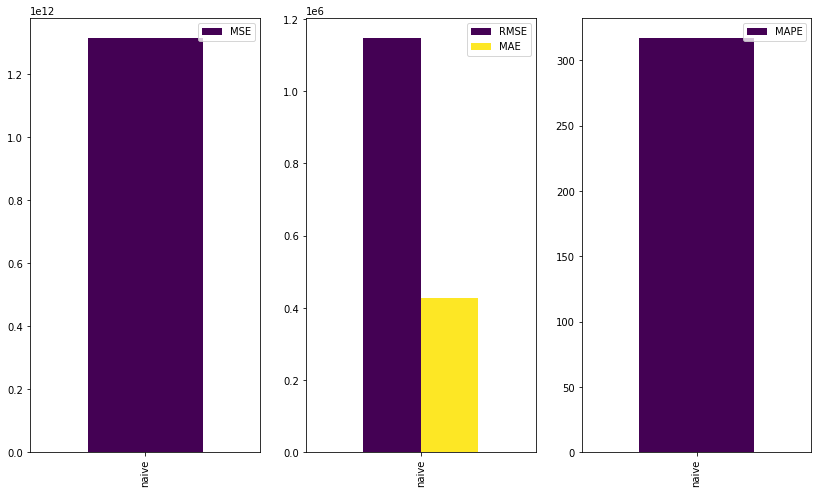

,MSE,RMSE,MAE,MAPE
naive,1.314748e+12,1.146625e+06,427174.839201,316.8487


In [66]:
y = res.y
err = res.drop(columns='y').sub(y, axis=0)
wo0 = y != 0

mea = pd.DataFrame()
mea['MSE'] = mse(err)
mea['RMSE'] = rmse(mea.MSE)
mea['MAE'] = mae(err)
mea['MAPE'] = mape(err, y)

fig, ax = plt.subplots(ncols=3)
mea.MSE.plot(kind='bar', ax=ax[0], colormap='viridis', legend=True)
mea[['RMSE', 'MAE']].plot.bar(ax=ax[1], colormap='viridis')
mea.MAPE.plot.bar(ax=ax[2], colormap='viridis', legend=True)
plt.show()

mea

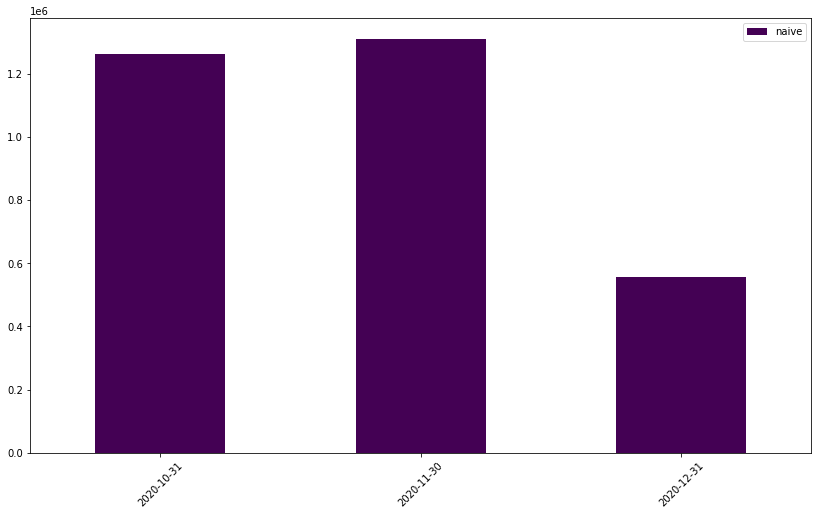

,naive
datetime,
2020-10-31,1.261747e+06
2020-11-30,1.311266e+06
2020-12-31,5.552366e+05


In [84]:
df = rmse(err.groupby(pd.Grouper(freq='m')).apply(mse))
df.index = df.index.strftime(date_format='%Y-%m-%d')

df.plot.bar(xlabel='' , colormap='viridis')
plt.xticks(rotation=45)
plt.show()

df

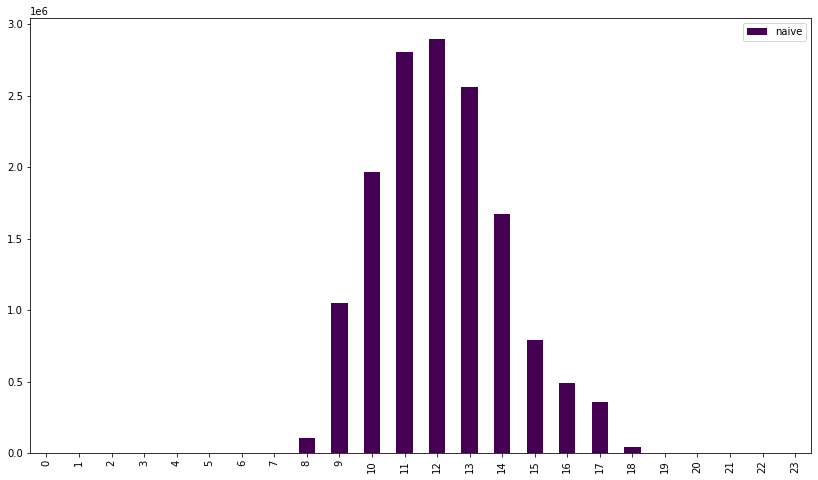

,naive
datetime,
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,0.000000e+00
6,0.000000e+00
7,2.310990e+02
8,1.064318e+05


In [87]:
df = rmse(err.groupby(err.index.hour).apply(mse))

df.plot.bar(xlabel='' , colormap='viridis')
plt.show()

df
